**Using SVM to distinguish Non-Linearly Seperable** 

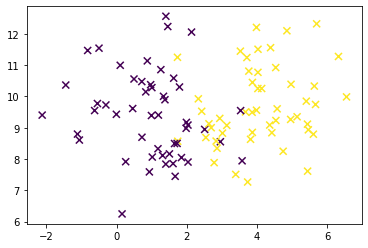

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

a,b = make_blobs(n_samples = 100, n_features= 2, centers = 2, cluster_std = 1.3, random_state=4)
b=b%2
X = np.concatenate((a[:,0],a[:,1]))
y = np.concatenate((b,b))
X=a
y=b
plt.figure()
plt.scatter(a[:,1], a[:,0], c=b, marker = 'x', s=50)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC

C_range = [.01,1,10]
gamma_range = [0.1,1,10]
print(C_range)
trainer=[]
tester=[]
#for C in C_range:
for gamma in gamma_range:
    classifier = SVC(kernel = 'poly', random_state = 0, gamma=gamma)
    print(classifier.fit(X_train, y_train).score(X_train, y_train))
    print(classifier.fit(X_train, y_train).score(X_test, y_test))
    trainer.append(classifier.fit(X_train, y_train).score(X_train, y_train))
    tester.append(classifier.fit(X_train, y_train).score(X_test, y_test))

[0.01, 1, 10]
0.5866666666666667
0.52
0.8933333333333333
0.88
0.9333333333333333
0.88


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


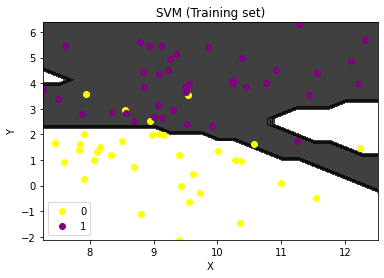

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'purple'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


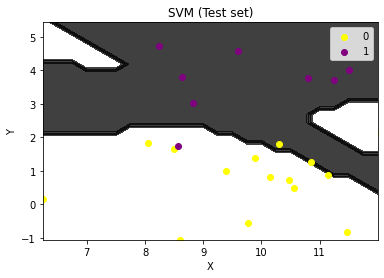

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'purple'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()